# Random Forest in Machine Learning

## Overview
**Random Forest** is an ensemble learning algorithm that builds multiple decision trees and combines their predictions for improved accuracy and robustness. It can be used for both classification and regression tasks.

## Importing Libraries
```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
```

## Loading Dataset
```python
data = pd.read_csv('Renewable_Energy_Adoption.csv')
data.head()
```

### Sample Data
| carbon_emissions | energy_output | renewability_index | cost_efficiency | adoption |
|-----------------|--------------|-------------------|---------------|----------|
| 181.08         | 128.29       | 0.642            | 0.732         | 1        |
| 382.75         | 672.77       | 0.084            | 2.891         | 0        |

## Preprocessing
```python
X = data.drop(columns=['adoption'])
y = data['adoption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

## Model Training
```python
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)
```

## Predictions & Evaluation
```python
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
```

## Feature Importance
```python
feature_importance = model.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=features, y=feature_importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.xticks(rotation=45)
plt.show()
```

## Conclusion
Random Forest enhances the performance of decision trees by averaging multiple trees to reduce overfitting and improve stability. Fine-tuning parameters like `n_estimators`, `max_depth`, and `criterion` can optimize performance.



In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Step 2: Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Step 3: Date preprocessing
# Drop columns not useful for prediction
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [5]:
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [6]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_4504\1630715454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_4504\1630715454.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [7]:
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [8]:
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [9]:
print(df.columns)  # Check available column names
print(df.head())   # View the dataset after encoding

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [10]:
# Converting text into numbers
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [11]:
# print(df.head())

In [12]:
# Feature and target
X=df.drop('Survived',axis=1)
y=df['Survived']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = RandomForestClassifier(max_depth=8,random_state=46)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=46)

In [15]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [16]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8212290502793296


In [17]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[96  9]
 [23 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [18]:
# param_grid = {
#     'n_estimators': [100, 200, 300, 500],  # More trees to improve stability
#     'max_depth': [3, 5, 7, 9, 12],  # Expanding depth range for more model flexibility
#     'min_samples_split': [2, 5, 10, 20],  # Higher values to prevent overfitting
#     'min_samples_leaf': [1, 2, 4, 6],  # Adjusting leaf nodes to control complexity
#     'max_features': ['sqrt', 'log2', None],  # Adding 'None' to allow all features
#     'bootstrap': [True, False],  # Testing both sampling strategies
#     'criterion': ['gini', 'entropy'],  # Adding multiple criteria for splitting trees
#     'oob_score': [True, False],  # Out-of-bag evaluation for generalization performance
#     'class_weight': ['balanced', None]  # Handling imbalanced datasets
# }


# rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Best estimator
# best_rf = grid_search.best_estimator_

# # Step 5: Evaluation
# y_pred = best_rf.predict(X_test)

# print("Best Parameters:", grid_search.best_params_)
# print("\nAccuracy:", accuracy_score(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Step 6: Feature importance plot
# importances = best_rf.feature_importances_
# feat_names = X.columns
# indices = np.argsort(importances)[::-1]

# plt.figure(figsize=(10, 6))
# sns.barplot(x=importances[indices], y=feat_names[indices])
# plt.title("Feature Importance from Random Forest")
# plt.show()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters: {'rf__bootstrap': False, 'rf__class_weight': 'balanced_subsample', 'rf__criterion': 'entropy', 'rf__max_depth': 5, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 15, 'rf__min_samples_split': 28, 'rf__n_estimators': 534}

Accuracy: 0.8379888268156425

Confusion Matrix:
 [[87 18]
 [11 63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       105
           1       0.78      0.85      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



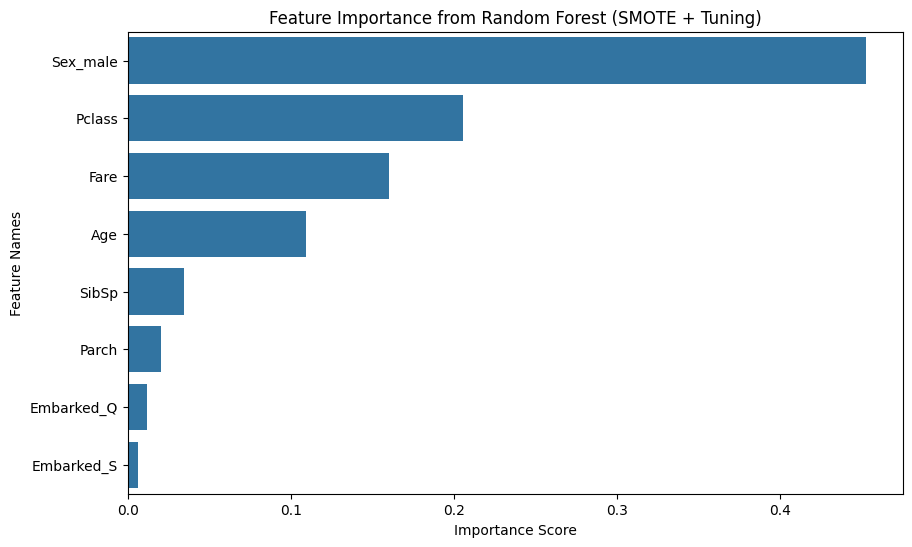

In [ ]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Define parameter grid
param_dist = {
    'n_estimators': sp_randint(100, 1500),
    'max_depth': [None] + list(range(5, 55, 5)),
    'min_samples_split': sp_randint(2, 40),
    'min_samples_leaf': sp_randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'bootstrap': [True, False],
}

# Step 2: Apply SMOTE to handle class imbalance
from imblearn.pipeline import Pipeline  # Imblearn's pipeline, not sklearn's

smote = SMOTE(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Step 3: Create a pipeline (SMOTE + RF)
pipeline = Pipeline([
    ('smote', smote),
    ('rf', rf)
])

# Step 4: Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions={
        'rf__' + key: value for key, value in param_dist.items()  # Use prefix for pipeline step
    },
    n_iter=200,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Step 5: Fit the model
random_search.fit(X_train, y_train)

# Step 6: Predict & Evaluate
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Feature importance
# Need to access `rf` inside pipeline
importances = best_rf.named_steps['rf'].feature_importances_
feat_names = np.array(X_train.columns)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feat_names[indices])
plt.title("Feature Importance from Random Forest (SMOTE + Tuning)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Names")
plt.show()


Fitting 5 folds for each of 150 candidates, totalling 750 fits


c:\Users\Tarun Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:28:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'xgb__colsample_bytree': np.float64(0.7119054028675783), 'xgb__gamma': np.float64(2.0560336043609313), 'xgb__learning_rate': np.float64(0.19083456460698955), 'xgb__max_depth': 18, 'xgb__n_estimators': 1024, 'xgb__reg_alpha': np.float64(0.2663702504474994), 'xgb__reg_lambda': np.float64(0.1524007591983263), 'xgb__subsample': np.float64(0.9762127308541534)}

Accuracy: 0.8324022346368715

Confusion Matrix:
 [[89 16]
 [14 60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



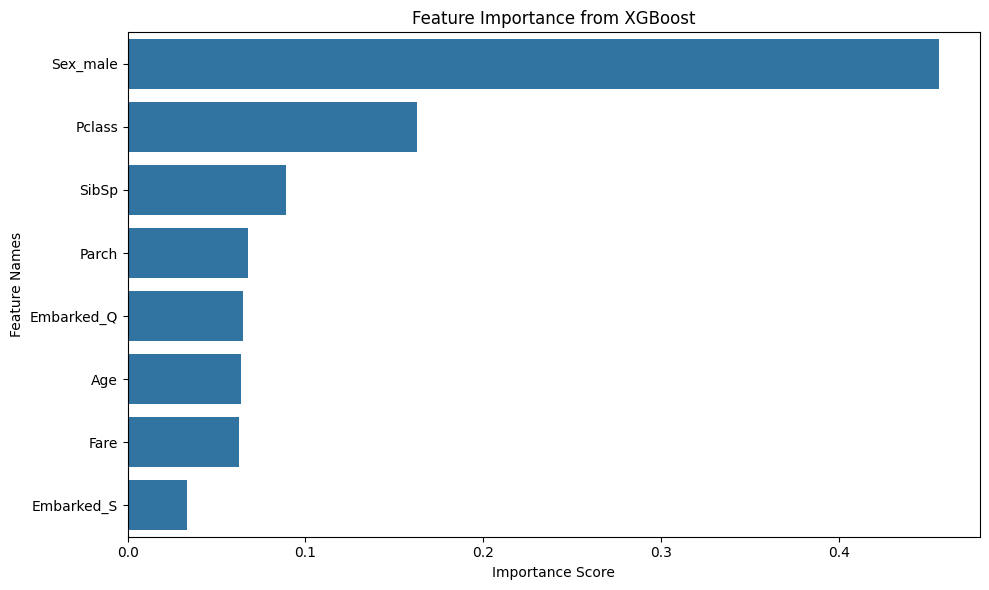

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform

# Step 1: Define parameter grid
param_dist = {
    'xgb__n_estimators': randint(100, 2500),
    'xgb__max_depth': randint(3, 20),
    'xgb__learning_rate': uniform(0.01, 0.3),
    'xgb__subsample': uniform(0.6, 0.4),
    'xgb__colsample_bytree': uniform(0.6, 0.4),
    'xgb__gamma': uniform(0, 5),
    'xgb__reg_alpha': uniform(0, 2),
    'xgb__reg_lambda': uniform(0, 2)
}

# Step 2: SMOTE + XGBoost pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Step 3: RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=150,
    scoring='roc_auc',  # better than accuracy/f1 for unbalanced
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Step 4: Fit model
random_search.fit(X_train, y_train)

# Step 5: Evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Feature importance
importances = best_model.named_steps['xgb'].feature_importances_
feat_names = np.array(X_train.columns)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feat_names[indices])
plt.title("Feature Importance from XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature Names")
plt.tight_layout()
plt.show()
